In [1]:
import gempy as gp 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import os 
import pyvista

No module named 'osgeo'


In [2]:
pwd

'/home/ana/Downloads/DATOS/5_GUAJIRA_ONSHORE/4_PORTETE'

In [3]:
geo_model = gp.create_data('PORTETE',
                           extent = [0, 5000, 0, 4000, -500, 2000],
                           resolution = [100, 50, 100],
                           path_o='Orientaciones_PORTETE_GO.txt',
                           path_i='Superficie_PORTETE_GOt.txt')

Active grids: ['regular']


In [5]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,Jsc,Default series,1,#015482,1
1,Jsch,Default series,2,#9f0052,2
2,Jc,Default series,3,#ffbe00,3
3,fault_1,Default series,4,#728f02,4
4,fault_2,Default series,5,#443988,5
5,fault_3,Default series,6,#ff3f20,6
6,basement,Basement,1,#5DA629,7


In [6]:
geo_model.orientations

,X,Y,Z,G_x,G_y,G_z,smooth,surface
3,632.9036,0,-131.8380,-0.139173,9.999744e-13,0.990268,0.01,Jc
0,1388.3752,0,842.2952,-0.997564,9.998168e-13,0.069756,0.01,fault_1
1,801.4848,0,1620.2099,0.629320,1.000039e-12,0.777146,0.01,fault_2
2,3776.4391,0,1840.6254,0.848048,1.000052e-12,0.529919,0.01,fault_3


In [7]:
gp.map_stack_to_surfaces(geo_model,
                        {"fault_1":('fault_1'),
                        "fault_2":('fault_2'),
                        "fault_3":('fault_3'),
                        "Strat_Series": ('Jc','Jsch','Jsc')},
                        remove_unused_series=True)

,surface,series,order_surfaces,color,id
3,fault_1,fault_1,1,#728f02,1
4,fault_2,fault_2,1,#443988,2
5,fault_3,fault_3,1,#ff3f20,3
0,Jsc,Strat_Series,1,#015482,4
1,Jsch,Strat_Series,2,#9f0052,5
2,Jc,Strat_Series,3,#ffbe00,6
6,basement,Basement,1,#5DA629,7


In [8]:
geo_model.series

,order_series,BottomRelation,isActive,isFault,isFinite
fault_1,1,Erosion,True,False,False
fault_2,2,Erosion,True,False,False
fault_3,3,Erosion,True,False,False
Strat_Series,4,Erosion,True,False,False
Basement,5,Erosion,False,False,False


In [9]:
geo_model.stack

,order_series,BottomRelation,isActive,isFault,isFinite
fault_1,1,Erosion,True,False,False
fault_2,2,Erosion,True,False,False
fault_3,3,Erosion,True,False,False
Strat_Series,4,Erosion,True,False,False
Basement,5,Erosion,False,False,False


In [10]:
geo_model.set_is_fault(['fault_2','fault_1','fault_3'])

Fault colors changed. If you do not like this behavior, set change_color to False.
Fault colors changed. If you do not like this behavior, set change_color to False.


,order_series,BottomRelation,isActive,isFault,isFinite
fault_1,1,Fault,True,True,False
fault_2,2,Fault,True,True,False
fault_3,3,Fault,True,True,False
Strat_Series,4,Erosion,True,False,False
Basement,5,Erosion,False,False,False


In [11]:
geo_model.faults.faults_relations_df

,fault_1,fault_2,fault_3,Strat_Series,Basement
fault_1,False,False,False,True,True
fault_2,False,False,False,True,True
fault_3,False,False,False,True,True
Strat_Series,False,False,False,False,False
Basement,False,False,False,False,False


In [12]:
geo_model.faults

,order_series,BottomRelation,isActive,isFault,isFinite
fault_1,1,Fault,True,True,False
fault_2,2,Fault,True,True,False
fault_3,3,Fault,True,True,False
Strat_Series,4,Erosion,True,False,False
Basement,5,Erosion,False,False,False


In [13]:
geo_model.grid

Grid Object. Values: 
array([[  25. ,   40. , -487.5],
       [  25. ,   40. , -462.5],
       [  25. ,   40. , -437.5],
       ...,
       [4975. , 3960. , 1937.5],
       [4975. , 3960. , 1962.5],
       [4975. , 3960. , 1987.5]])

In [14]:
gp.set_interpolator(
    geo_model,
    output=['geology'],
    theano_optimizer='fast compile')

Setting kriging parameters to their default values.
Compiling aesara function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  3
Compilation Done!
Kriging values: 
                           values
range                6873.863542
$C_o$                  1125000.0
drift equations  [3, 3, 3, 3, 3]


In [15]:
gp.get_data(geo_model, 'orientations')

,X,Y,Z,G_x,G_y,G_z,smooth,surface
0,1388.3752,0,842.2952,-0.997564,9.998168e-13,0.069756,0.01,fault_1
1,801.4848,0,1620.2099,0.629320,1.000039e-12,0.777146,0.01,fault_2
2,3776.4391,0,1840.6254,0.848048,1.000052e-12,0.529919,0.01,fault_3
3,632.9036,0,-131.8380,-0.139173,9.999744e-13,0.990268,0.01,Jc


/home/ana/anaconda3/envs/gempyv2/lib/python3.10/site-packages/gempy/plot/plot_api.py:261: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


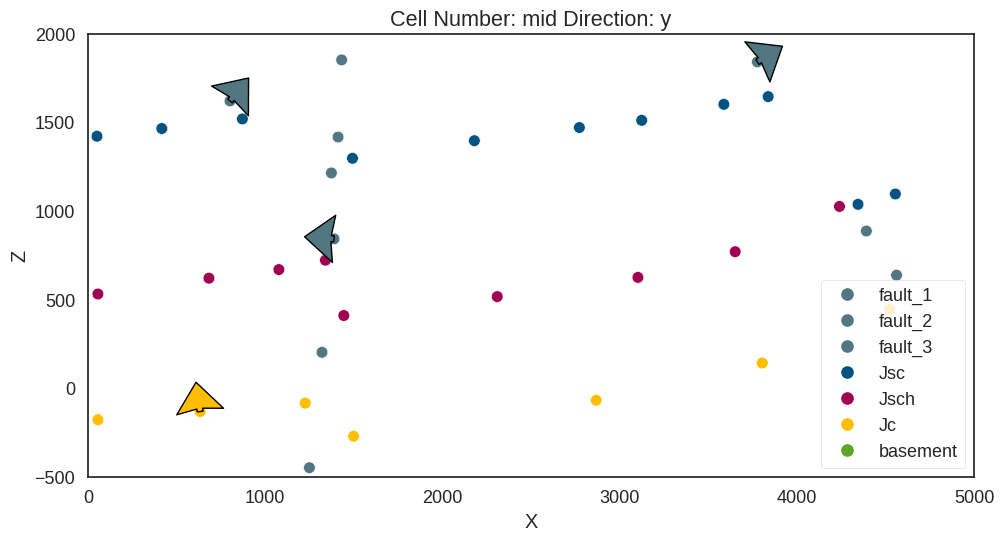

In [16]:
plot = gp.plot_2d(geo_model, show_lith=False, show_boundaries=False)
plt.show()

In [17]:
gpv = gp.plot_3d(geo_model, image=False, plotter_type='basic')

In [17]:
gp.get_data(geo_model, 'kriging')

,values
range,6873.863542
$C_o$,1125000.0
drift equations,"[3, 3, 3, 3, 3]"


In [18]:
sol = gp.compute_model(geo_model)

In [19]:
geo_model.solutions


Lithology ids 
  [7. 7. 7. ... 4. 4. 4.] 

/home/ana/anaconda3/envs/gempyv2/lib/python3.10/site-packages/gempy/plot/plot_api.py:261: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


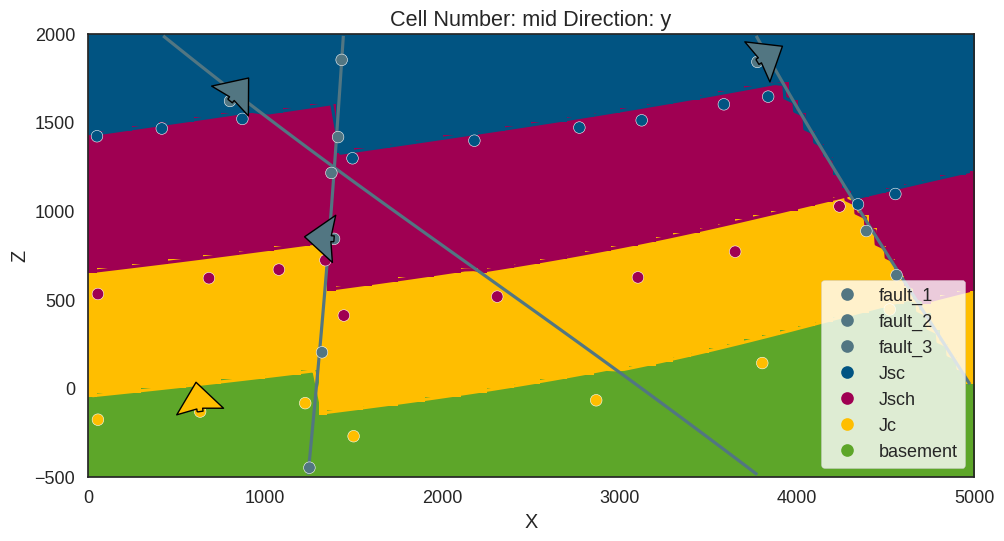

In [20]:
gp.plot_2d(geo_model, show_data=True)
plt.show()

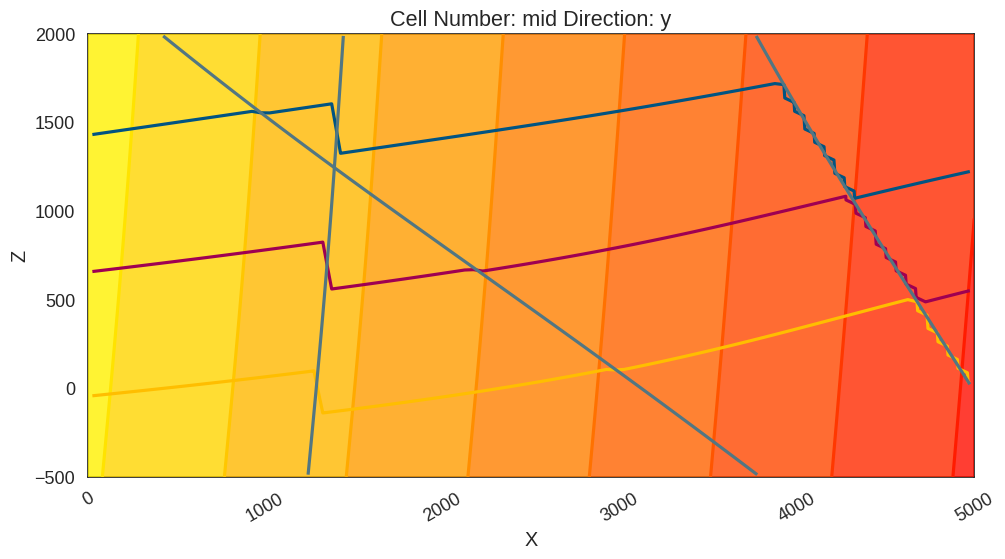

In [22]:
gp.plot_2d(geo_model, show_data=False, show_scalar=True, show_lith=False)
plt.show()

/home/p9835/anaconda3/envs/gempy/lib/python3.10/site-packages/gempy/plot/plot_api.py:261: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


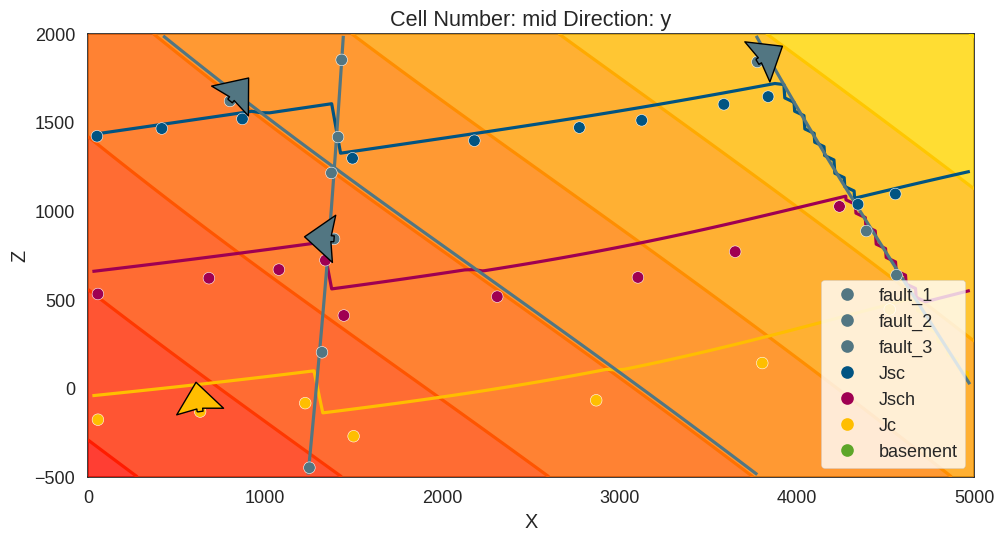

In [23]:
gp.plot_2d(geo_model, series_n=1, show_data=True, show_scalar=True, show_lith=False)
plt.show()

In [21]:
ver, sim = gp.get_surfaces(geo_model)
gpv = gp.plot_3d(geo_model, image=False, plotter_type='basic')

In [22]:
geo_model.solutions.scalar_field_at_surface_points

array([[-0.70020796,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  1.35486369,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  1.77838428,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.43762214,  0.30141457,
         0.16846319]])

/home/p9835/anaconda3/envs/gempy/lib/python3.10/site-packages/gempy/plot/plot_api.py:261: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


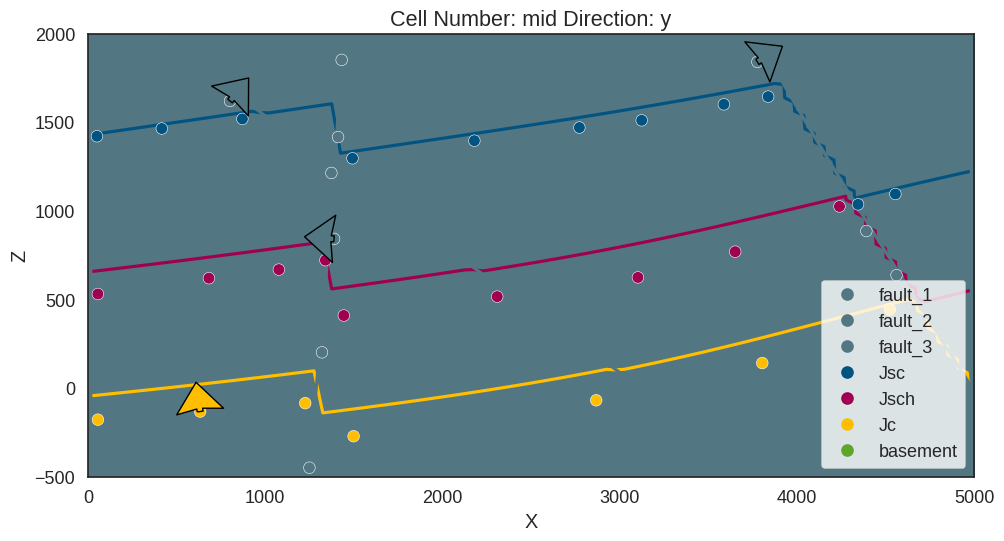

In [26]:
gp.plot_2d(geo_model, show_block=True, show_lith=False)
plt.show()

/home/p9835/anaconda3/envs/gempy/lib/python3.10/site-packages/gempy/plot/plot_api.py:261: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


<function matplotlib.pyplot.show(close=None, block=None)>

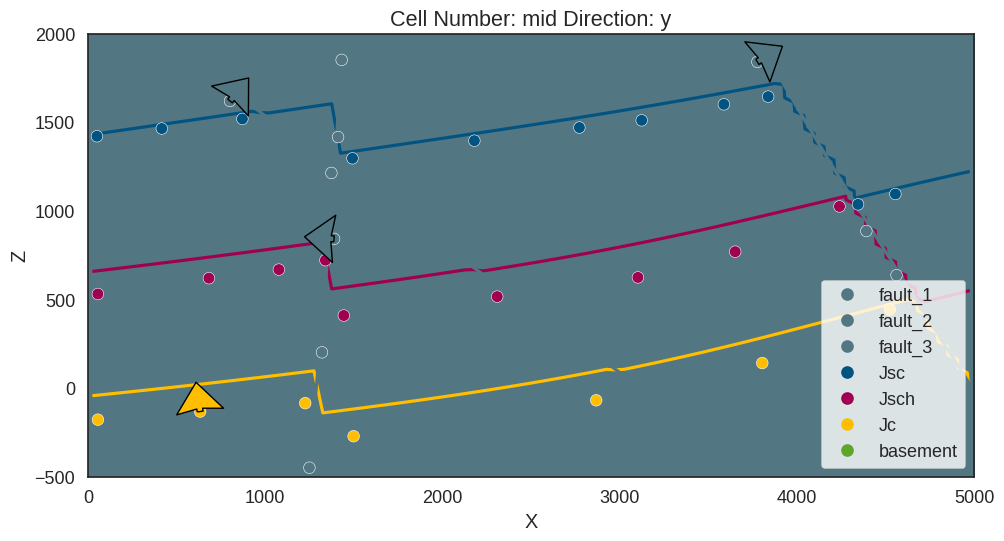

In [27]:
gp.plot_2d(geo_model, series_n=1, show_block=True, show_lith=False)
plt.show

In [23]:
#guardar modelo 3d
import pickle
pickle.dump(geo_model, open("portrete_GON.p", "wb"))

In [35]:
#load
modelo = pickle.load(open("portrete_GON.p", "rb"))

# ASIGNACIÓN PROPIEDADES GEOFÍSICAS

In [25]:
modelo.surfaces

,surface,series,order_surfaces,color,id
3,fault_1,fault_1,1,#527682,1
4,fault_2,fault_2,1,#527682,2
5,fault_3,fault_3,1,#527682,3
0,Jsc,Strat_Series,1,#015482,4
1,Jsch,Strat_Series,2,#9f0052,5
2,Jc,Strat_Series,3,#ffbe00,6
6,basement,Basement,1,#5DA629,7


In [36]:
#ASIGNAR PROPIEDADES FISICAS
modelo.add_surface_values([2500, 2500, 2500, 2800, 2000, 3000, 2800], ['vp'])  #m/s vp
#modelo.add_surface_values([2.32, 2.32, 2.32, 2.67, 2.5, 2.9, 2.67], ['density'])  #g/cm3 density


,surface,series,order_surfaces,color,id,vp
3,fault_1,fault_1,1,#527682,1,2500
4,fault_2,fault_2,1,#527682,2,2500
5,fault_3,fault_3,1,#527682,3,2500
0,Jsc,Strat_Series,1,#015482,4,2800
1,Jsch,Strat_Series,2,#9f0052,5,2000
2,Jc,Strat_Series,3,#ffbe00,6,3000
6,basement,Basement,1,#5DA629,7,2800


/home/ana/anaconda3/envs/gempyv2/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


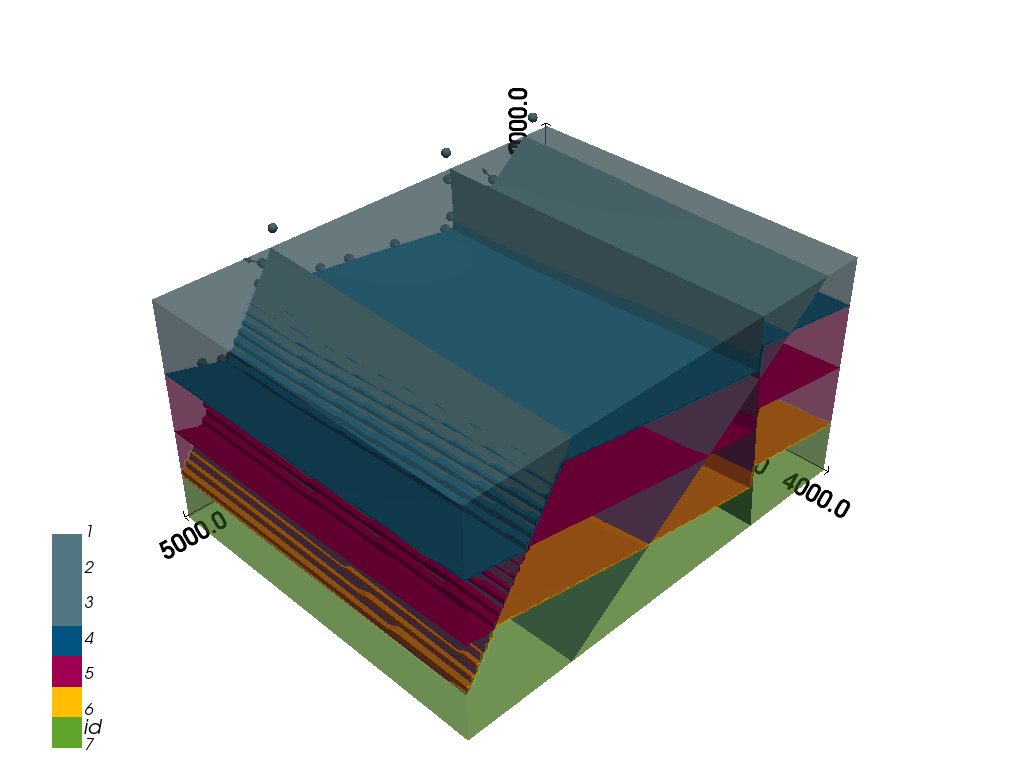

[StructuredGrid (0x7cf8781db700)
   N Cells:      480249
   N Points:     500000
   X Bounds:     2.500e+01, 4.975e+03
   Y Bounds:     4.000e+01, 3.960e+03
   Z Bounds:     -4.875e+02, 1.988e+03
   Dimensions:   100, 50, 100
   N Arrays:     1,

In [37]:
# Set up plotter
p3d = gp.plot_3d(modelo, notebook=True)
# Plot data points and orientations
p3d.plot_data()

# Compute the model. Note that a solution is returned. We will use this later
sol = gp.compute_model(modelo)

# Plot the surfaces
p3d.plot_surfaces()
# Plot the lithological units
p3d.plot_structured_grid('lith')

In [38]:
sol.values_matrix #asignar propiedades geofísicas al modelo

array([[2800., 2800., 2800., ..., 2800., 2800., 2800.]])

In [39]:
# Reshaping our data to the shape required by Devito
import numpy as np
shape = [100,50,100]
reshaped = np.reshape(sol.values_matrix, shape, order='C')
modelo_propiedades = np.flip(reshaped, axis=2).T

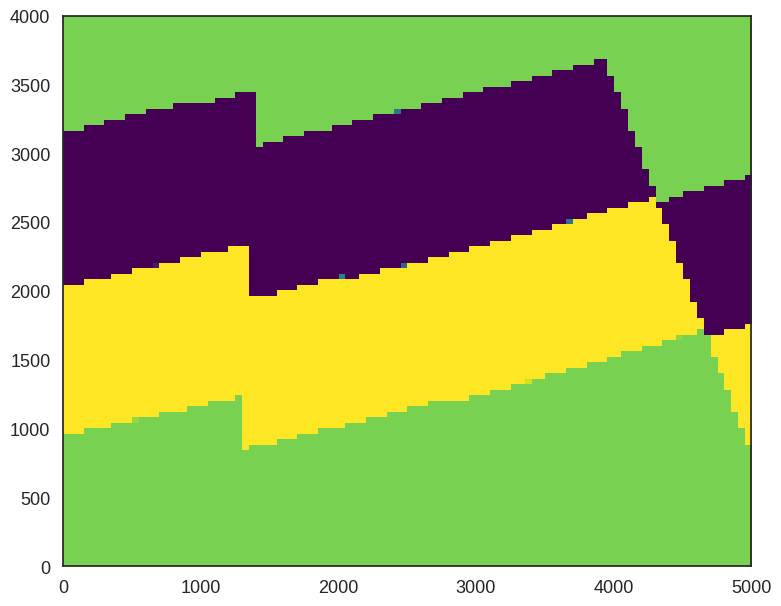

In [40]:
plt.imshow(modelo_propiedades[:,49,:], cmap='viridis', extent=[0, 5000, 0, 4000, -500, 2000])

In [41]:
np.save('vp.npy', modelo_propiedades)

In [42]:
xp =np.load('vp.npy')

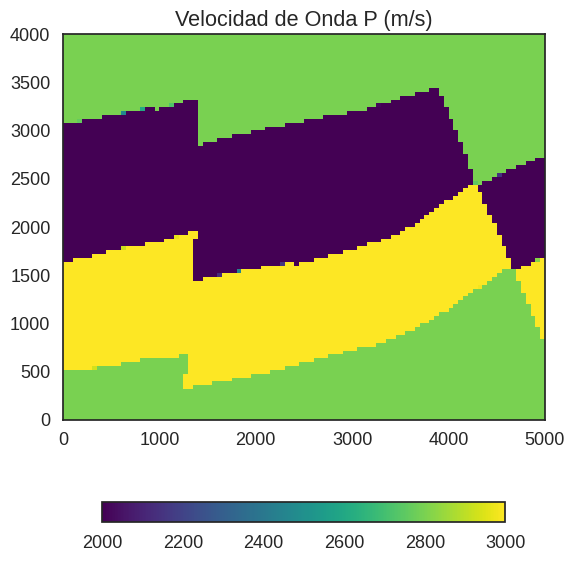

In [43]:
import matplotlib.pyplot as plt

# Take the center slice in the x directio
# Remember that in Devito, indexing convention is [x, y, z] (need to flip for correct imshow display)
plt.imshow(xp[:,0,:], cmap='viridis', extent=[0, 5000, 0, 4000, -500, 2000])
plt.title('Velocidad de Onda P (m/s)')
#plt.title('Densidad (g/cm3)')
plt.colorbar(location="bottom", shrink=0.5)
plt.savefig('vp.png', dpi=300)
plt.show()

# PROPAGACIÓN DEL ERROR: MÉTODO MONTE CARLO

In [44]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
3,fault_1,fault_1,1,#527682,1
4,fault_2,fault_2,1,#527682,2
5,fault_3,fault_3,1,#527682,3
0,Jsc,Strat_Series,1,#015482,4
1,Jsch,Strat_Series,2,#9f0052,5
2,Jc,Strat_Series,3,#ffbe00,6
6,basement,Basement,1,#5DA629,7


In [45]:
indices_bool = geo_model.surface_points.df['surface'].isin(['Jsc','Jsch','Jc'])

In [46]:
indices = geo_model.surface_points.df.index[indices_bool]
indices

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26],
      dtype='int64')

In [47]:
Z_init = geo_model.surface_points.df.loc[(indices, ['Z', 'surface'])].copy()

In [48]:
df = pd.DataFrame(Z_init)

In [49]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
3,fault_1,fault_1,1,#527682,1
4,fault_2,fault_2,1,#527682,2
5,fault_3,fault_3,1,#527682,3
0,Jsc,Strat_Series,1,#015482,4
1,Jsch,Strat_Series,2,#9f0052,5
2,Jc,Strat_Series,3,#ffbe00,6
6,basement,Basement,1,#5DA629,7


In [50]:
# Filtrar el DataFrame
capa1 = df[df['surface'] == 'Jsc']['Z']
capa2 = df[df['surface'] == 'Jsch']['Z']
capa3 = df[df['surface'] == 'Jc']['Z']

In [51]:
def sample(silent=True):
    Z_var = np.random.normal(0, 30, size=3)
    Z_loc = np.hstack([capa1 + Z_var[0],
                       capa2 + Z_var[1],
                       capa3 + Z_var[2]])
    
    if silent:
        geo_model.modify_surface_points(indices, Z=Z_loc)
        gp.compute_model(geo_model)
    else:
        # Crear un objeto de trazado utilizando gp.plot_2d
        plot_object = gp.plot_2d(geo_model)
        
        # Pasar el objeto de trazado como argumento a modify_surface_points
        geo_model.modify_surface_points(indices, Z=Z_loc, plot_object=plot_object)
    
    return geo_model.solutions.lith_block

In [52]:
lith_blocks = np.array([])
n_iterations = 10  # Número de iteraciones que deseas

for i in range(n_iterations):
    lith_blocks = np.append(lith_blocks, sample())

In [53]:
lith_blocks = lith_blocks.reshape(n_iterations, -1)
lith_blocks.shape, lith_blocks

((10, 500000),
 array([[7., 7., 7., ..., 4., 4., 4.],
        [7., 7., 7., ..., 4., 4., 4.],
        [7., 7., 7., ..., 4., 4., 4.],
        ...,
        [7., 7., 7., ..., 4., 4., 4.],
        [7., 7., 7., ..., 4., 4., 4.],
        [7., 7., 7., ..., 4., 4., 4.]]))

In [54]:
from gempy.bayesian.fields import compute_prob, calculate_ie_masked
prob_block = compute_prob(lith_blocks)

/home/ana/anaconda3/envs/gempyv2/lib/python3.10/site-packages/gempy/bayesian/fields.py:8: UserWarning: This function is Deprecated, please use the probability function instead
  warnings.warn("This function is Deprecated, please use the probability function instead")


/home/ana/anaconda3/envs/gempyv2/lib/python3.10/site-packages/gempy/plot/plot_api.py:261: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


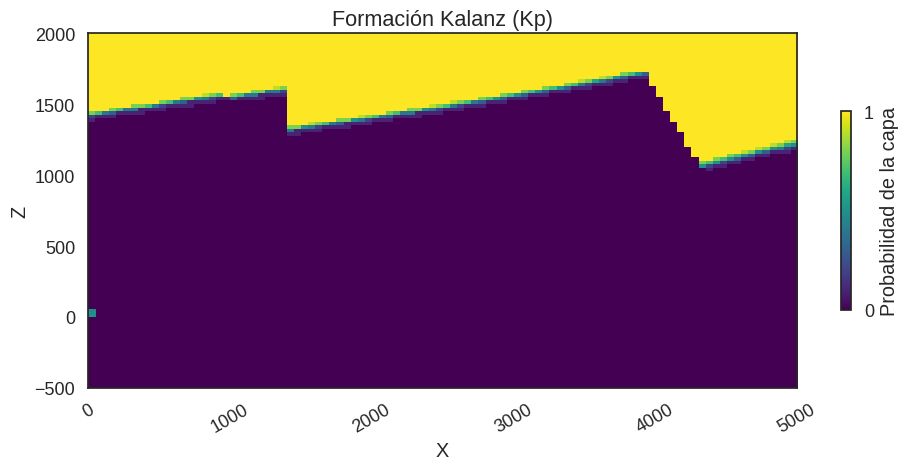

In [55]:
layer = 0
p2dp = gp.plot_2d(geo_model,
                  show_lith=False, show_boundaries=False,
                  show_data=False,
                  regular_grid=prob_block[layer],
                  kwargs_regular_grid={'cmap': 'viridis', 'norm': None})

prob_min = prob_block[layer].min()  # Valor mínimo de probabilidad
prob_max = prob_block[layer].max()  # Valor máximo de probabilidad

# Crear algunos datos de muestra
data = np.random.rand(50, 50)

# Crear un gráfico con imshow y obtener el objeto mappable
mappable = plt.imshow(data, cmap='viridis')

# Agregar un título a la imagen
plt.title('Formación Kalanz (Kp)')

# Crear una barra de color usando el objeto mappable
colorbar = plt.colorbar(mappable, shrink=0.3)

# Editar los números de los ticks de la barra de color
colorbar.set_ticks([0, 1])  # Definir las ubicaciones de los ticks
#colorbar.set_ticklabels(['Bajo', 'Medio', 'Alto'])  # Definir las etiquetas de los ticks
colorbar.set_label('Probabilidad de la capa')  # Definir la etiqueta

# Guardar la figura después de mostrarla
plt.savefig('Probabilidad_Kp_GON.png', dpi=300)
plt.show()

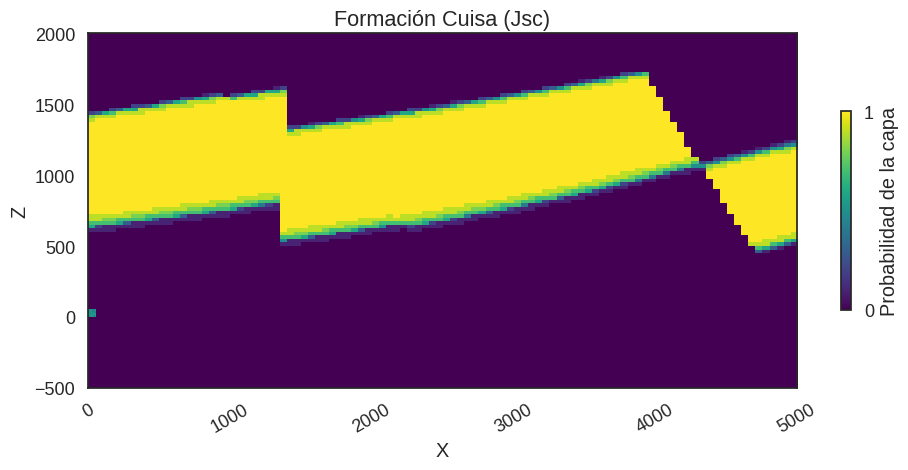

In [56]:
layer = 1
p2dp = gp.plot_2d(geo_model,
                  show_lith=False, show_boundaries=False,
                  show_data=False,
                  regular_grid=prob_block[layer],
                  kwargs_regular_grid={'cmap': 'viridis', 'norm': None})

prob_min = prob_block[layer].min()  # Valor mínimo de probabilidad
prob_max = prob_block[layer].max()  # Valor máximo de probabilidad

# Crear algunos datos de muestra
data = np.random.rand(50, 50)

# Crear un gráfico con imshow y obtener el objeto mappable
mappable = plt.imshow(data, cmap='viridis')

# Agregar un título a la imagen
plt.title('Formación Cuisa (Jsc)')

# Crear una barra de color usando el objeto mappable
colorbar = plt.colorbar(mappable, shrink=0.3)

# Editar los números de los ticks de la barra de color
colorbar.set_ticks([0, 1])  # Definir las ubicaciones de los ticks
#colorbar.set_ticklabels(['Bajo', 'Medio', 'Alto'])  # Definir las etiquetas de los ticks
colorbar.set_label('Probabilidad de la capa')  # Definir la etiqueta

# Guardar la figura después de mostrarla
plt.savefig('Probabilidad_Jsc_GON.png', dpi=300)
plt.show()

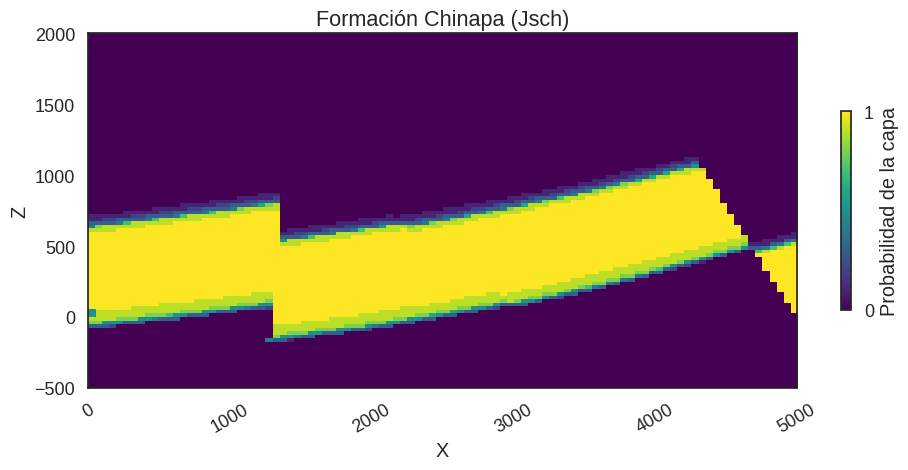

In [57]:
layer = 2
p2dp = gp.plot_2d(geo_model,
                  show_lith=False, show_boundaries=False,
                  show_data=False,
                  regular_grid=prob_block[layer],
                  kwargs_regular_grid={'cmap': 'viridis', 'norm': None})

prob_min = prob_block[layer].min()  # Valor mínimo de probabilidad
prob_max = prob_block[layer].max()  # Valor máximo de probabilidad

# Crear algunos datos de muestra
data = np.random.rand(50, 50)

# Crear un gráfico con imshow y obtener el objeto mappable
mappable = plt.imshow(data, cmap='viridis')

# Agregar un título a la imagen
plt.title('Formación Chinapa (Jsch)')

# Crear una barra de color usando el objeto mappable
colorbar = plt.colorbar(mappable, shrink=0.3)

# Editar los números de los ticks de la barra de color
colorbar.set_ticks([0, 1])  # Definir las ubicaciones de los ticks
#colorbar.set_ticklabels(['Bajo', 'Medio', 'Alto'])  # Definir las etiquetas de los ticks
colorbar.set_label('Probabilidad de la capa')  # Definir la etiqueta

# Guardar la figura después de mostrarla
plt.savefig('Probabilidad_Jsch_GON.png', dpi=300)
plt.show()

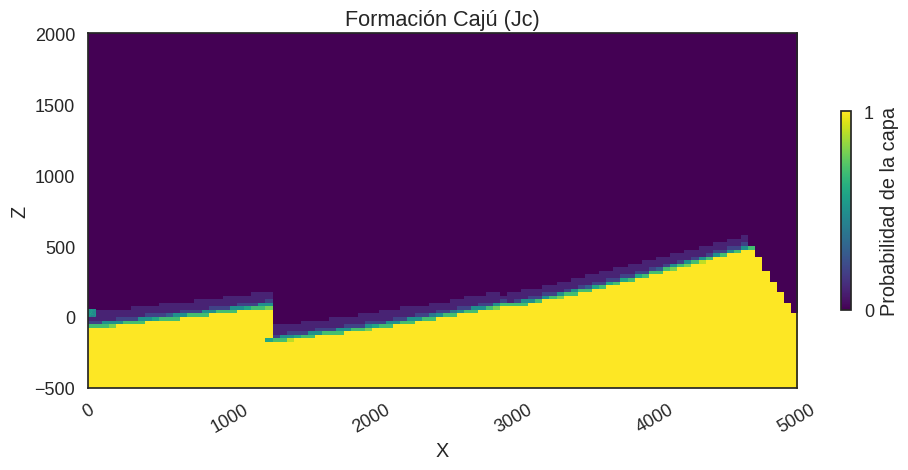

In [58]:
layer = 3
p2dp = gp.plot_2d(geo_model,
                  show_lith=False, show_boundaries=False,
                  show_data=False,
                  regular_grid=prob_block[layer],
                  kwargs_regular_grid={'cmap': 'viridis', 'norm': None})

prob_min = prob_block[layer].min()  # Valor mínimo de probabilidad
prob_max = prob_block[layer].max()  # Valor máximo de probabilidad

# Crear algunos datos de muestra
data = np.random.rand(50, 50)

# Crear un gráfico con imshow y obtener el objeto mappable
mappable = plt.imshow(data, cmap='viridis')

# Agregar un título a la imagen
plt.title('Formación Cajú (Jc)')

# Crear una barra de color usando el objeto mappable
colorbar = plt.colorbar(mappable, shrink=0.3)

# Editar los números de los ticks de la barra de color
colorbar.set_ticks([0, 1])  # Definir las ubicaciones de los ticks
#colorbar.set_ticklabels(['Bajo', 'Medio', 'Alto'])  # Definir las etiquetas de los ticks
colorbar.set_label('Probabilidad de la capa')  # Definir la etiqueta

# Guardar la figura después de mostrarla
plt.savefig('Probabilidad_Jc_GON.png', dpi=300)
plt.show()

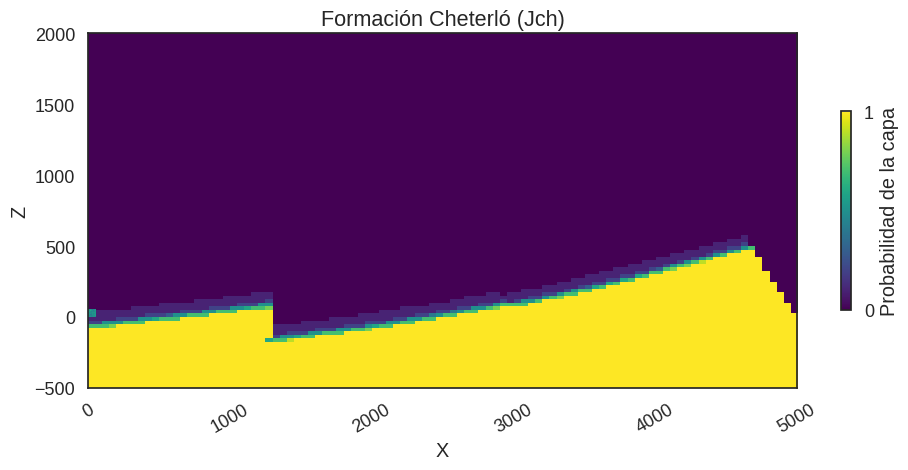

In [59]:
layer = 3
p2dp = gp.plot_2d(geo_model,
                  show_lith=False, show_boundaries=False,
                  show_data=False,
                  regular_grid=prob_block[layer],
                  kwargs_regular_grid={'cmap': 'viridis', 'norm': None})

prob_min = prob_block[layer].min()  # Valor mínimo de probabilidad
prob_max = prob_block[layer].max()  # Valor máximo de probabilidad

# Crear algunos datos de muestra
data = np.random.rand(50, 50)

# Crear un gráfico con imshow y obtener el objeto mappable
mappable = plt.imshow(data, cmap='viridis')

# Agregar un título a la imagen
plt.title('Formación Cheterló (Jch)')

# Crear una barra de color usando el objeto mappable
colorbar = plt.colorbar(mappable, shrink=0.3)

# Editar los números de los ticks de la barra de color
colorbar.set_ticks([0, 1])  # Definir las ubicaciones de los ticks
#colorbar.set_ticklabels(['Bajo', 'Medio', 'Alto'])  # Definir las etiquetas de los ticks
colorbar.set_label('Probabilidad de la capa')  # Definir la etiqueta

# Guardar la figura después de mostrarla
plt.savefig('Probabilidad_Jch_GON.png', dpi=300)
plt.show()